# Scraping: H&M Sales

**It's officially hot outside**, which means we need some summertime clothes. We live in New York City, though, so all our money goes to rent: we need to shop *as cheaply as possible*. So let's shop [sales at H&M](http://www.hm.com/us/products/sale)!

**Answer the questions below using either Men's or Women's sale items at H&M.**

## Preparation: knowing your tags

### What is the tag name and class name for a product?

In [1]:
#product tag name <div class="product-info">      

### What is the tag name and class name for the old price? The new price?

In [ ]:
# old price tag name: <span class="old-price">
# new price tag name: <span class="price">

### What is the tag name and class name for the link to the product page?

In [ ]:
# link tag name:  <a href class="product-url"

## Setup: Import what you'll need to scrape the page

Use `requests`, not `urllib`.

In [26]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

## Try to scrape the page: how many product names can you find?

"Try" to do it, because it *will not work.* Once you've learned that it won't work, spend a few minutes **looking at the page code** to see if you can figure out why.

Eventually, ask for help by writing on the board.

In [27]:
url = "http://www.hm.com/us/products/sale/men"

In [28]:
response = requests.get(url)

In [29]:
doc = BeautifulSoup(response.text, "html.parser")

In [30]:
doc.find_all("div", class_="m-product")

[]

In [ ]:
#non-scrapeable (JavaScript)

## URLs

### What is the URL for data about on-sale men's clothing?

In [5]:
# http://api.hm.com/v2/us/en/products/display?categories=sale%2Fmen&concealCategories=true&pageSize=60&page=1&deviceType=DESKTOP

### What is the URL for data about on-sale women's clothing?

In [ ]:
# http://api.hm.com/v2/us/en/products/display?categories=sale%2Fladies&concealCategories=true&pageSize=60&page=1&deviceType=DESKTOP

### What is the URL for data about on-sale women's tops?

In [ ]:
# http://api.hm.com/v2/us/en/products/display?categories=sale%2Fladies%2Ftops&concealCategories=true&pageSize=60&page=1&deviceType=DESKTOP

### What changes about the url based on what you're looking for?

In [ ]:
# categories

## Request on-sale women's tops.

### How many results do you get?

In [31]:
url = "http://api.hm.com/v2/us/en/products/display?categories=sale%2Fladies%2Ftops&concealCategories=true&pageSize=60&page=1&deviceType=DESKTOP"

In [32]:
response = requests.get(url)

In [33]:
data = response.json()

In [34]:
data.keys()

dict_keys(['searchInfo', 'pagination', 'recommendations', 'displayArticles', 'filter', 'trackingInfo', 'content'])

In [35]:
len(data['displayArticles'])

60

In [39]:
#correct answer is 360 - according to the displayed number on the website

### How many total results are there? How do you change the URL to get more?

There are a few ways to change the URL to: there is one very easy way and one a-little-difficult way.

In [ ]:
# changing the pageSize in the URL step by step from 60 to a higher number, in this case for example at 500

In [44]:
url = "http://api.hm.com/v2/us/en/products/display?categories=sale%2Fladies%2Ftops&concealCategories=true&pageSize=500&page=1&deviceType=DESKTOP"

In [45]:
response = requests.get(url)

In [46]:
data = response.json()

In [47]:
data.keys()

dict_keys(['searchInfo', 'pagination', 'recommendations', 'displayArticles', 'filter', 'trackingInfo', 'content'])

### Download all on-sale women's tops and save them to a CSV.

I want this CSV to include

- Name
- Product code/number
- Old price
- On-sale price
- Item's URL

In [48]:
print(data['displayArticles'][0])

{'productNumber': '65274', 'castorProductNumber': '0478110', 'castorArticleNumber': '001', 'articleCode': '65274-B', 'name': 'Short-sleeved Top', 'availableSizeInfo': [{'stockSize': '003', 'sizeName': 'XS'}, {'stockSize': '004', 'sizeName': 'S'}, {'stockSize': '005', 'sizeName': 'M'}, {'stockSize': '006', 'sizeName': 'L'}, {'stockSize': '007', 'sizeName': 'XL'}], 'primaryImage': {'type': 'STILL_LIFE_FRONT', 'url': '//lp.hm.com/hmprod?set=key[source],value[/model/2017/E00 0478110 001 77 1688.jpg]&set=key[rotate],value[]&set=key[width],value[]&set=key[height],value[]&set=key[x],value[]&set=key[y],value[]&set=key[type],value[STILL_LIFE_FRONT]&set=key[hmver],value[2]&set=key[quality],value[80]&set=key[size],value[346x405]&call=url[file:/mobile/v2/product]'}, 'webUrl': 'http://www.hm.com/us/product/65274?article=65274-B', 'availableSwatches': [{'colour': 'ffffff', 'fabricImageResource': '/fabric/2017/AA6FB049-4F2D-4827-805F-4D7271619395.jpg', 'fabricUrl': '//lp.hm.com/hmprod?set=source[/fab

In [49]:
articles = data['displayArticles']

In [50]:
scrape_products = []
for article in articles:
    current = {}
    current["name"] = article["name"]
    current["code"] = article["articleCode"]
    current["oldprice"] = article["priceInfo"]["formattedOldPrice"]
    current["price"] = article["priceInfo"]["formattedPrice"]
    current["url"] = article["webUrl"]
    scrape_products.append(current)

In [51]:
df = pd.DataFrame(scrape_products)

In [52]:
df.to_csv("scrape_products.csv", index=False)

## Analyzing on-sale items

### Read in the on-sale CSV and make sure the data looks right

In [53]:
pd.read_csv("scrape_products.csv")

,code,name,oldprice,price,url
0,65274-B,Short-sleeved Top,$9.99,$6.99,http://www.hm.com/us/product/65274?article=652...
1,65274-A,Short-sleeved Top,$9.99,$6.99,http://www.hm.com/us/product/65274?article=652...
2,65274-F,Short-sleeved Top,$9.99,$6.99,http://www.hm.com/us/product/65274?article=652...
3,65274-E,Short-sleeved Top,$9.99,$6.99,http://www.hm.com/us/product/65274?article=652...
4,60133-B,Jersey Top,$12.99,$5,http://www.hm.com/us/product/60133?article=601...
5,60133-E,Jersey Top,$12.99,$5,http://www.hm.com/us/product/60133?article=601...
6,60133-F,Jersey Top,$12.99,$5,http://www.hm.com/us/product/60133?article=601...
7,68934-C,Jersey Top,$12.99,$5.99,http://www.hm.com/us/product/68934?article=689...
8,63019-A,T-shirt with Printed Design,$12.99,$5.99,http://www.hm.com/us/product/63019?article=630...
9,65300-D,Crêped Camisole Top,$17.99,$7,http://www.hm.com/us/product/65300?article=653...


### Convert the prices to numbers, if you haven't already

In [55]:
df["oldprice"] = df["oldprice"].str[1:].astype(float)

In [56]:
df["price"] = df["price"].str[1:].astype(float)

### What is the average on-sale price of a women's top? Make a histogram, too, please.

In [61]:
df["price"].mean()

11.214736842105262

In [62]:
%matplotlib inline

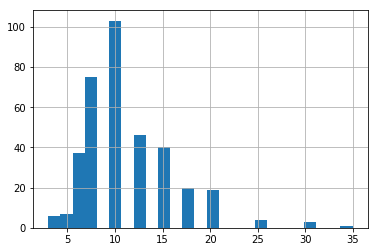

In [80]:
df["price"].hist(bins=25)

### What is the average discount between full price and on sale? Histogram too, please.

In [66]:
df["discount"] = df["oldprice"] - df["price"]

In [68]:
df["discount"].mean()

8.5642936288088638

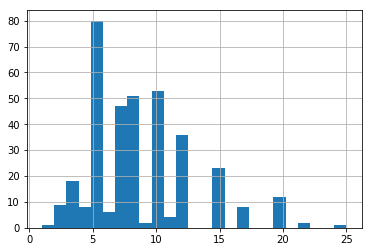

In [76]:
df["discount"].hist(bins=25)

### What is the average discount as a percentage of the full price? Histogram too, please.

In [74]:
df["discount_percent"] = df["discount"] / df["oldprice"] * 100
df["discount_percent"].mean()
print(df["discount_percent"].mean(),"Prozent")

42.5915104821 Prozent


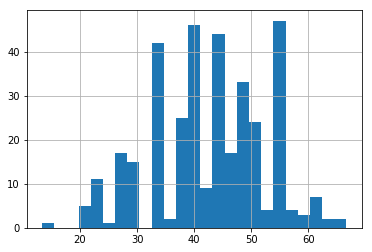

In [77]:
df["discount_percent"].hist(bins=25)

## Shopping the sales

### How many items are over 50% off?


In [84]:
df[df["discount_percent"] > 50]

,code,name,oldprice,price,url,discount,discount_percent
4,60133-B,Jersey Top,12.99,5.00,http://www.hm.com/us/product/60133?article=601...,7.99,61.508853
5,60133-E,Jersey Top,12.99,5.00,http://www.hm.com/us/product/60133?article=601...,7.99,61.508853
6,60133-F,Jersey Top,12.99,5.00,http://www.hm.com/us/product/60133?article=601...,7.99,61.508853
7,68934-C,Jersey Top,12.99,5.99,http://www.hm.com/us/product/68934?article=689...,7.00,53.887606
8,63019-A,T-shirt with Printed Design,12.99,5.99,http://www.hm.com/us/product/63019?article=630...,7.00,53.887606
9,65300-D,Crêped Camisole Top,17.99,7.00,http://www.hm.com/us/product/65300?article=653...,10.99,61.089494
10,65300-A,Crêped Camisole Top,17.99,7.00,http://www.hm.com/us/product/65300?article=653...,10.99,61.089494
11,65300-B,Crêped Camisole Top,17.99,7.00,http://www.hm.com/us/product/65300?article=653...,10.99,61.089494
12,65300-C,Crêped Camisole Top,17.99,7.00,http://www.hm.com/us/product/65300?article=653...,10.99,61.089494
13,68934-A,Jersey Top,12.99,5.99,http://www.hm.com/us/product/68934?article=689...,7.00,53.887606


### Display all items above 50% off.

Pandas doesn't want to show you every row. Change its settings so it will display up to **200 rows of content.**

In [88]:
pd.set_option('display.max_rows', 200)

In [89]:
df[df["discount_percent"] > 50]

,code,name,oldprice,price,url,discount,discount_percent
4,60133-B,Jersey Top,12.99,5.00,http://www.hm.com/us/product/60133?article=601...,7.99,61.508853
5,60133-E,Jersey Top,12.99,5.00,http://www.hm.com/us/product/60133?article=601...,7.99,61.508853
6,60133-F,Jersey Top,12.99,5.00,http://www.hm.com/us/product/60133?article=601...,7.99,61.508853
7,68934-C,Jersey Top,12.99,5.99,http://www.hm.com/us/product/68934?article=689...,7.00,53.887606
8,63019-A,T-shirt with Printed Design,12.99,5.99,http://www.hm.com/us/product/63019?article=630...,7.00,53.887606
9,65300-D,Crêped Camisole Top,17.99,7.00,http://www.hm.com/us/product/65300?article=653...,10.99,61.089494
10,65300-A,Crêped Camisole Top,17.99,7.00,http://www.hm.com/us/product/65300?article=653...,10.99,61.089494
11,65300-B,Crêped Camisole Top,17.99,7.00,http://www.hm.com/us/product/65300?article=653...,10.99,61.089494
12,65300-C,Crêped Camisole Top,17.99,7.00,http://www.hm.com/us/product/65300?article=653...,10.99,61.089494
13,68934-A,Jersey Top,12.99,5.99,http://www.hm.com/us/product/68934?article=689...,7.00,53.887606
